In [2]:
import pandas as pd
#csv파일 데이터를 판다스 데이터프레암으로 가져옴
fish = pd.read_csv('https://bit.ly/fish_csv_data')
#상위 5개만 출력
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
#species열을 타겟으로 즉, 다른 열 데이터를 입력받아 어떤 종에 속하는지 확률로 판별 할 것임
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
#타겟 데이터 species준비
fish_target = fish['Species'].to_numpy()
#인풋 데이터 상위 5개 출력
print(fish_input[:5])


[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
from sklearn.model_selection import train_test_split
#트레이닝셋, 테스트셋 분할
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
#표준화 전처리
from sklearn.preprocessing import StandardScaler
#훈련세트로 변환기 학습
ss = StandardScaler()
ss.fit(train_input)
#학습한 변환기로 트레이닝, 테스트셋 표준화 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#표준화한 트레이닝 셋으로 k-최근접 모델 학습
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
#결과 확인
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타겟 데이터가 7개인 상황이므로 다중분류에 속함.
k-최근접 모델이 확률을 예측 한다는 것은 주변 k개의 데이터의 비율을 따진다는 것이다.

In [ ]:
#훈련시킨 모델의 타깃 클래스를 확인_문자열 형태 그대로 반환
print(kn.classes_)
#species열에 해당하는 데이터 7개가 찍힘

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#테스트데이터 상위 5개의 클래스 분류 결과
print(kn.predict(test_scaled[:5]))
#predict메소드는 타겟 클래스 중 어느 클래스로 분류 되는디 결과만 반환

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
#어떻게 위의 결과가 나왔을까
import numpy as np
#클래스별 확률 값을 확인_이 결과를 토대로 predict메소드 결과를 도출
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


1번째 샘플 1의 확률로 perch, 4번째 샘플 0.6667의 확률로 perch..이때의 확률이 각 클래스 빈도수/전체 클래스 개수(k)

In [ ]:
#즉, 4번째 샘플에서 주변 3개의 데이터 중 2개가 perch클래스, 1개가 roach클래스
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [ ]:
#로지스틱 회귀 분류로 2진 분류
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
#불리언 인덱싱_배열의 특정 행만 고를 수 있다
print(char_arr[[True, False, True, False, False]])
#2개의 타겟 클래스를 제외하고 나머지를 false로 반환하여
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#트레이닝 셋을 구성하면 2개의 타겟 클래스만 골라낼 수 있다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]


['A' 'C']


In [ ]:
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀분류 모델 학습
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
#상위 5개 셈플 결과 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#위의 결과가 나온 근거_예측 확률 확인
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
#z값을 확인해보면 2번째 샘플만 양수이다. 위에서 양성 클래스로 분류 됨을 알 수 있다.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)


[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
#z값을 시그몽드 함수에 대입하면 위의 확률을 얻을 수 있다.
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


이진분류를 너머 다중 분류를 수행한다.

In [ ]:
#로지스틱 회귀 모델의 다중분류
#제어 완화, 반복횟수 조절
lr = LogisticRegression(C=20, max_iter=1000)
#표준화 전처리 한 7개의 클래스가 속한 트레이닝 데이터와 타겟 데이터로 모델 훈련_다중 분류
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
#상위 5개 샘플 예측 결과 확인
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
#위 샘플의 클래스별 예측 확률 확인
proba = lr.predict_proba(test_scaled[:5])
#소숫점 반올림
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
#클래스 순서 확인
print(lr.classes_)


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


18~20셀의 결과를 분석해보자.
1번 행의 3번째 클래스 예측 확률이 가장 높다. 이는 3번째 클래스인 perch로 분류 됨을 확인 할 수 있다.
4번 행의 5번째 클래스 예측 확률이 가장 높다. 이는 5번째 클래스인 roach로 분류 됨으로 확인 할 수 있다.

In [ ]:
#선형 방정식 확인
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중분류 로지스틱 회귀 모델의 선형방정식을 분석해보자.
coef_배열의 열은 학습에 쓰인 특성에 맞춰 5 임을 확인한다. 행이 7개 인 것에서 z가 클래스 마다 하나씩 생성 됨을 알 수 있다. 이때 가장 높은 z값을 출력하는 클래스가 예측 결과 클래스가 된다. 또, z값을 소프트맥스 메소드에 전달하면 위의 셀 15~16처럼 각 클래스의 예측 확률을 구할 수 있다.

In [ ]:
#사용하는 메소드는 이진분류와 동일
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


위의 결과와 셀 15(이진분류 z값 배열)을 비교해보자. 5개의 샘플에 대한 각각의 z값이 1개인 곳에 비해(5*1), 다중분류의 경우 5개의 샘플의 7개 클래스에 대한 z값을 각각 계산한다.(7*5)
1번 샘플의 3번째 클래스 z값이 가장 크고 결과적으로 perch로 분류됨을 확인 할 수 있다.

In [ ]:
from scipy.special import softmax
#위에서 구한 z값을 소프트맥스 함수에 대입하면 셀 19와 같은 결과가 나오는 것은 당연한 이야기.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 배치 학습(오프라인 학습)
지금까지는 모든 훈련 데이터를 한번에 학습 시켰다. 학습된 내용을 문제에 적용하면 더이상의 학습은 이루어지지 않는다. *그렇다면, 새로운 데이터가 들어왔을때, 이전 디에터+새로운 데이터를 포함한 전체 데이터를 다시 처음부터 학습시키고 새로운 모델을 사용해야한다.*
# 점진적 학습(온라인 학습)
학습이 끝난 모델에 대해 작은 묶음의 새로운 데이터가 배치된다.(미니배치) 새로운 데이터를 주입하여 모델을 학습시키고 이전 모델은 보관할 필요가 없으므로 저장공간 면에서 경제적임은 당연하겠지.
# 확률적 경사 하강법(SGD)
랜덤하게 한 샘플을 선택하여 손실 함수의 경사를 따라 이동하여 만족할 수준의 낮은 손실 함수 값에 도달하는 알고리즘. *새로운 데이터가 들어왔을때 다시 산 꼭대기부터 시작하지 않아도 된다. 이는 신경망 모델에서 빛을 발한다. 많은 데이터를 사용하기에 한번에 모든 데이터를 쓸 수 없으니까.*
즉, 객체를 다시 만들지 않아도 된다.
손실함수와 예측값사이의 관계는 블로그에서 정리하기로 하자.



In [4]:
#위에서 만든 판다스 데이터프레임을 그대로 사용하자.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
#표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
#특성값 스케일에 맞춰 두 넘파이 배열 준비
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [5]:
#환률적 경사 하강법 분류 클래스 준비
from sklearn.linear_model import SGDClassifier
#손실 함수로는 로지스틱 손실 함수, 에포크 횟수는 10회로 지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
#메소드의 이름에서도 느낄 수 있듯이 앞선 훙련에 이어서 1에포크씩 훈련 시킬 수 있다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


에포크가 너무 크다면 오버피팅, 작으면 언더피팅이 일어 날 것임은 너무 명확하다.
적절한 에포크 값을 찾기 위해 점차 횟수를 늘려가면 훈련세트와 테스트 세트에 대한 예측 결과가 높아지다가 오버피팅이 발생하는 순간 테스트셋에 대한 예측 결과가 나빠지기 시작한다.

In [7]:
#오버피팅이 발생하기 직전 훈련을 멈추는 조기종료
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
#예측 겨로가 기록용 배열 생성
train_score = []
test_score = []
#partial_fit메소드로 모델을 훈련시키기 위해 전체 클래스의 레이블 필요_생선 7종류
classes = np.unique(train_target)
#에포크 횟수 300
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    #예측 결과 배열에 값 저장
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


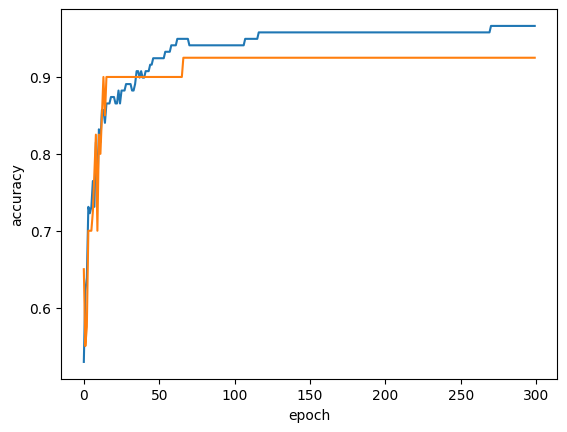

In [8]:
#결과 그래프 확인
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 그래프에서 파랑, 주황 그래프 사이가 벌어지는 시점 100을 적정 에포크 횟수로 판단.

In [9]:
#에포크 100에 맞춰 모델 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925
